# Speech to text / Automatic speech recognition

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/audio/speech_to_text.ipynb)

This tutorial demonstrates how to use the `transcribe_audios` function to convert audio files into text transcriptions efficiently.

## Setup
First, let's import the necessary libraries and the function we'll be using.

In [1]:
%pip install 'senselab[audio]'

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

from senselab.audio.data_structures import Audio
from senselab.audio.tasks.preprocessing import downmix_audios_to_mono, resample_audios
from senselab.audio.tasks.speech_to_text import transcribe_audios
from senselab.audio.tasks.speech_to_text_evaluation import calculate_wer
from senselab.utils.data_structures import DeviceType, HFModel
from senselab.utils.tasks.plotting import plot_transcript

%matplotlib inline

/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()


## Specifying the ASR model and the preferred device
Let's initialize the model we want to use (remember to specify both the ```path_or_uri``` and the ```revision``` for reproducibility purposes) and the device we prefer.

In [3]:
model = HFModel(path_or_uri="openai/whisper-tiny", revision="main")
device = DeviceType.CPU

## Loading Audio Files
Now let's load and process the audio files we want to transcribe using senselab's built-in tools.

In [4]:
!mkdir -p tutorial_audio_files
!wget -O tutorial_audio_files/audio_48khz_mono_16bits.wav https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
!wget -O tutorial_audio_files/audio_48khz_stereo_16bits.wav https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_stereo_16bits.wav

audio1 = Audio(filepath=os.path.abspath("tutorial_audio_files/audio_48khz_mono_16bits.wav"))
audio2 = Audio(filepath=os.path.abspath("tutorial_audio_files/audio_48khz_stereo_16bits.wav"))

--2025-09-15 19:07:05--  https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav [following]
--2025-09-15 19:07:05--  https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472488 (461K) [audio/wav]
Saving to: ‘tutorial_audio_files/audio_48khz_mono_16bits.wav’

tutorial_audio_file 100%[===================>] 461.41K  --.-KB/s   

## Preprocessing
Let's preprocess the audio data to make it suitable with the ASR model characteristics that we can find in the model card in the HuggingFace Hub.

In [5]:
# Downmix to mono
audio2 = downmix_audios_to_mono([audio2])[0]

# Resample both audios to 16kHz
audios = resample_audios([audio1, audio2], 16000)

/Users/fabiocat/git/senselab/src/senselab/audio/data_structures/audio.py:183: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  info = torchaudio.info(filepath)
/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torchaudio/_backend/soundfile_backend.py:120: UserWarning: torchaudio._backend.common.AudioMetaData has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pyt

## Transcription
Let's finally transcribe the audio clips. 

Note: If you know the language spoken in your clips, you can specify that using the ```language``` parameter. For more details, see the [**dedicated documentation**](https://sensein.group/senselab/senselab/audio/tasks/speech_to_text.html).

In [6]:
transcripts = transcribe_audios(audios=audios, model=model, device=device)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cpu
Using `chunk_length_s` is very experimental with seq2seq models. The results will not necessarily be entirely accurate and will have caveats. More information: https://github.com/huggingface/transformers/pull/20104. Ignore this warning with pipeline(..., ignore_warning=True). To use Whisper for long-form transcription, use rather the model's `generate` method directly as the model relies on it's own chunking mechanism (cf. Whisper original paper, section 3.8. Long-form Transcription).
2025-09-15 19:07:09,033 - senselab - INFO - Time taken to initialize the hugging face ASR pipeline: 0.88 seconds
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate yo

Here is the result of the analysis.

In [7]:
transcripts

[This is Peter. This is Johnny. Kenny. Thank you. We just wanted to take a minute to thank you. [0.00 - 4.90]
     This [0.00 - 0.30]
     is [0.30 - 0.48]
     Peter. [0.48 - 1.06]
     This [1.06 - 1.18]
     is [1.18 - 1.40]
     Johnny. [1.40 - 1.72]
     Kenny. [1.86 - 2.42]
     Thank [2.42 - 2.66]
     you. [2.66 - 2.98]
     We [3.38 - 3.58]
     just [3.58 - 3.78]
     wanted [3.78 - 3.90]
     to [3.90 - 4.04]
     take [4.04 - 4.24]
     a [4.24 - 4.38]
     minute [4.38 - 4.48]
     to [4.48 - 4.68]
     thank [4.68 - 4.90]
     you. [4.90 - 4.90],
 This is Peter. This is Johnny. Kenny. Thank you. We just wanted to take a minute to thank you. [0.00 - 5.14]
     This [0.00 - 0.30]
     is [0.30 - 0.48]
     Peter. [0.48 - 1.06]
     This [1.06 - 1.18]
     is [1.18 - 1.40]
     Johnny. [1.40 - 1.72]
     Kenny. [1.86 - 2.42]
     Thank [2.42 - 2.66]
     you. [2.66 - 2.98]
     We [3.38 - 3.58]
     just [3.58 - 3.78]
     wanted [3.78 - 3.90]
     to [3.90 - 4.04]
     take

## Transcript visualization
Let's visualize the transcript better.

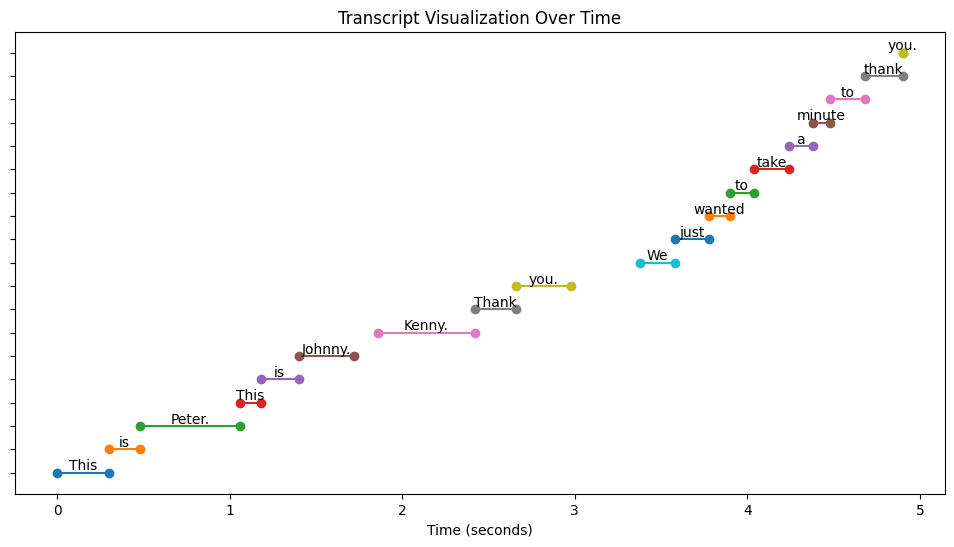

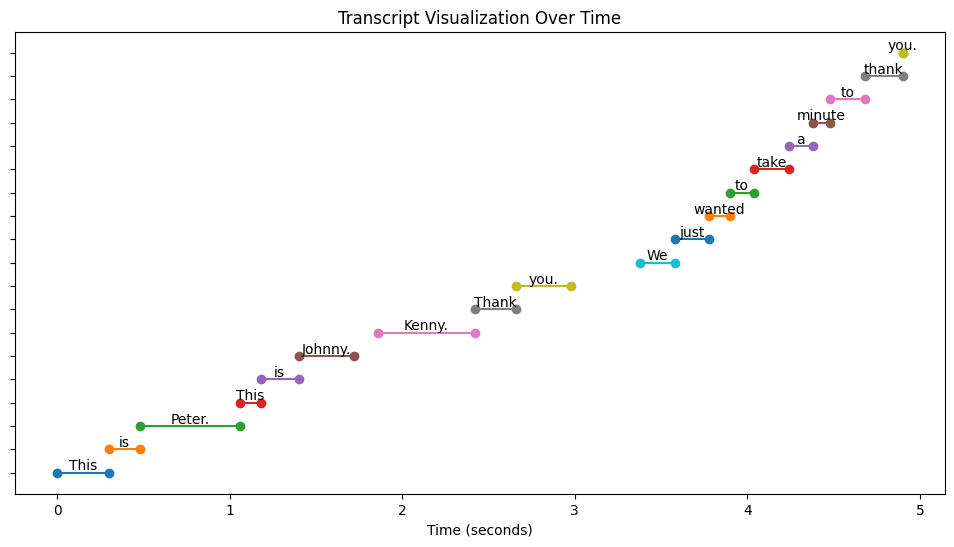

In [8]:
plot_transcript(transcripts[0])

## Transcript evaluation
To compare the performance of a model against the ground truth using the Senselab functionalities, you can compute the word error rate (WER). The WER evaluates the accuracy of the model by considering the number of insertions, deletions, and substitutions, normalized by the total number of words in the reference string.

In [9]:
ground_truth = "This is Peter. This is Johnny. Kenny. And Joe. We just wanted to take a minute to thank you."

wer = calculate_wer(reference=ground_truth, hypothesis=transcripts[0].text)
print(f"The Word Error Rate (WER) is: {wer}")

The Word Error Rate (WER) is: 0.10526315789473684


Check the [**documentation**](https://sensein.group/senselab/senselab/audio/tasks/speech_to_text_evaluation.html) for more details.